In [1]:
import pandas as pd
import numpy as np
import uproot
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
input_bkg = ['trees/MaxDigis_tree_Neutrino_gun.root']
first_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
input_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root',
            ]
comp_treename = 'comparator'
wire_treename = 'wire'

comp_vars = [ 'Ev_max_nComp_ME11','Ev_max_nComp_ME12','Ev_max_nComp_ME13','Ev_max_nComp_ME21','Ev_max_nComp_ME22',
             'Ev_max_nComp_ME31','Ev_max_nComp_ME32','Ev_max_nComp_ME41','Ev_max_nComp_ME42']
wire_vars = [ 'Ev_max_nWire_ME11','Ev_max_nWire_ME12','Ev_max_nWire_ME13','Ev_max_nWire_ME21','Ev_max_nWire_ME22',
             'Ev_max_nWire_ME31','Ev_max_nWire_ME32','Ev_max_nWire_ME41','Ev_max_nWire_ME42']

#all_vars = [ 'Ev_nComp_ME11','Ev_nComp_ME12']

comp_vars = list(set(comp_vars))
wire_vars = list(set(wire_vars))

arrs_comp_sig = [None]*(len(input_sig)+1)
arrs_wire_sig = [None]*(len(input_sig)+1)

print "Opening input files"

print "Opening file: ", first_sig
arrs_comp_sig[0] = uproot.open(first_sig[0])[comp_treename]
arrs_wire_sig[0] = uproot.open(first_sig[0])[wire_treename]
comp_sig = arrs_comp_sig[0].pandas.df(comp_vars)
wire_sig = arrs_wire_sig[0].pandas.df(wire_vars)

j=1
for i in (input_sig):
    print "Opening file: ", i
    arrs_comp_sig[j] = uproot.open(i)[comp_treename]
    arrs_wire_sig[j] = uproot.open(i)[wire_treename]
    temp_comp_sig = arrs_comp_sig[j].pandas.df(comp_vars)
    temp_wire_sig = arrs_wire_sig[j].pandas.df(wire_vars)
    comp_sig = comp_sig.append(temp_comp_sig)
    wire_sig = wire_sig.append(temp_wire_sig)
    j=j+1


print "Opening file: ", input_bkg
arrs_comp_bkg = uproot.open(input_bkg[0])[comp_treename]
arrs_wire_bkg = uproot.open(input_bkg[0])[wire_treename]
comp_bkg = arrs_comp_bkg.pandas.df(comp_vars)
wire_bkg = arrs_wire_bkg.pandas.df(wire_vars)

Opening input files
Opening file:  ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root
Opening file:  ['trees/MaxDigis_tree_Neutrino_gun.root']


In [3]:
# efficiency=[0]
# comp_sig_tot = len(comp_sig)
# rate=[0]
# comp_bkg_tot = len(comp_bkg)

# min_=30
# max_=60
# it=5

# for comp11 in tqdm(xrange(min_,max_,it)):
#   for comp12 in xrange(min_,max_,it):
#     for comp13 in xrange(min_,max_,it):
#       for comp21 in xrange(min_,max_,it):
#         for comp22 in xrange(min_,max_,it):
#           for comp31 in xrange(min_,max_,it):
#             for comp32 in xrange(min_,max_,it):
#               for comp41 in xrange(min_,max_,it):
#                 for comp42 in xrange(min_,max_,it):

#                   efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > comp11) | (comp_sig['Ev_max_nComp_ME12'] > comp12) | (comp_sig['Ev_max_nComp_ME13'] > comp13) |
#                                                  (comp_sig['Ev_max_nComp_ME21'] > comp21) | (comp_sig['Ev_max_nComp_ME22'] > comp22) |
#                                                  (comp_sig['Ev_max_nComp_ME31'] > comp31) | (comp_sig['Ev_max_nComp_ME32'] > comp32) |
#                                                  (comp_sig['Ev_max_nComp_ME41'] > comp41) | (comp_sig['Ev_max_nComp_ME41'] > comp42)])/comp_sig_tot*100)
                
#                   rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > comp11) | (comp_bkg['Ev_max_nComp_ME12'] > comp12) | (comp_bkg['Ev_max_nComp_ME13'] > comp13) |
#                                            (comp_bkg['Ev_max_nComp_ME21'] > comp21) | (comp_bkg['Ev_max_nComp_ME22'] > comp22) |
#                                            (comp_bkg['Ev_max_nComp_ME31'] > comp31) | (comp_bkg['Ev_max_nComp_ME32'] > comp32) |
#                                            (comp_bkg['Ev_max_nComp_ME41'] > comp41) | (comp_bkg['Ev_max_nComp_ME41'] > comp42)])/comp_bkg_tot*30*1000)

In [4]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=120
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[#(comp_sig['Ev_max_nComp_ME11'] > limit) | (comp_sig['Ev_max_nComp_ME12'] > limit) | (comp_sig['Ev_max_nComp_ME13'] > limit) |
                                        (comp_sig['Ev_max_nComp_ME21'] > limit) | (comp_sig['Ev_max_nComp_ME22'] > limit) |
                                        (comp_sig['Ev_max_nComp_ME31'] > limit) | (comp_sig['Ev_max_nComp_ME32'] > limit) |
                                        (comp_sig['Ev_max_nComp_ME41'] > limit) | (comp_sig['Ev_max_nComp_ME41'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[#(comp_bkg['Ev_max_nComp_ME11'] > limit) | (comp_bkg['Ev_max_nComp_ME12'] > limit) | (comp_bkg['Ev_max_nComp_ME13'] > limit) |
                                  (comp_bkg['Ev_max_nComp_ME21'] > limit) | (comp_bkg['Ev_max_nComp_ME22'] > limit) |
                                  (comp_bkg['Ev_max_nComp_ME31'] > limit) | (comp_bkg['Ev_max_nComp_ME32'] > limit) |
                                  (comp_bkg['Ev_max_nComp_ME41'] > limit) | (comp_bkg['Ev_max_nComp_ME41'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)

100%|██████████| 120/120 [00:02<00:00, 59.13it/s]


Text(0.5,1,'Comparator ROC Curve')

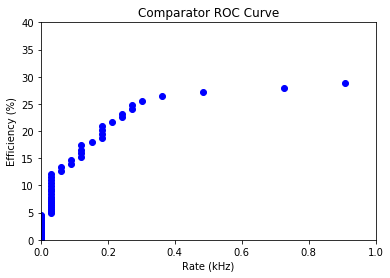

In [5]:
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,1)
plt.ylim(0,40)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve')

In [6]:
for i in range(len(comp_rate)):
    if comp_rate[i] > 0.4 and comp_rate[i] < 1:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

rate = 0.907389782388 kHz and efficiency = 28.8312815657 % for threshold > 30
rate = 0.72591182591 kHz and efficiency = 27.9869002525 % for threshold > 31
rate = 0.483941217273 kHz and efficiency = 27.2608901515 % for threshold > 32


In [7]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=120
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[#(wire_sig['Ev_max_nWire_ME11'] > limit) | (wire_sig['Ev_max_nWire_ME12'] > limit) | (wire_sig['Ev_max_nWire_ME13'] > limit) |
                                        (wire_sig['Ev_max_nWire_ME21'] > limit) | (wire_sig['Ev_max_nWire_ME22'] > limit) |
                                        (wire_sig['Ev_max_nWire_ME31'] > limit) | (wire_sig['Ev_max_nWire_ME32'] > limit) |
                                        (wire_sig['Ev_max_nWire_ME41'] > limit) | (wire_sig['Ev_max_nWire_ME41'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[#(wire_bkg['Ev_max_nWire_ME11'] > limit) | (wire_bkg['Ev_max_nWire_ME12'] > limit) | (wire_bkg['Ev_max_nWire_ME13'] > limit) |
                                  (wire_bkg['Ev_max_nWire_ME21'] > limit) | (wire_bkg['Ev_max_nWire_ME22'] > limit) |
                                  (wire_bkg['Ev_max_nWire_ME31'] > limit) | (wire_bkg['Ev_max_nWire_ME32'] > limit) |
                                  (wire_bkg['Ev_max_nWire_ME41'] > limit) | (wire_bkg['Ev_max_nWire_ME41'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)

100%|██████████| 120/120 [00:02<00:00, 51.54it/s]


Text(0.5,1,'Wire ROC Curve')

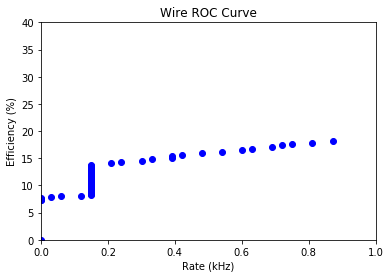

In [8]:
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,1)
plt.ylim(0,40)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve')

In [9]:
for i in range(len(wire_rate)):
    if wire_rate[i] > 0.4 and wire_rate[i] < 1.0:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

rate = 0.871028684877 kHz and efficiency = 18.1581747251 % for threshold > 67
rate = 0.810957741092 kHz and efficiency = 17.8350474839 % for threshold > 68
rate = 0.750886797308 kHz and efficiency = 17.5789100366 % for threshold > 69
rate = 0.720851325415 kHz and efficiency = 17.3542971983 % for threshold > 70
rate = 0.690815853523 kHz and efficiency = 17.0429916854 % for threshold > 71
rate = 0.630744909738 kHz and efficiency = 16.7671513575 % for threshold > 72
rate = 0.600709437846 kHz and efficiency = 16.4834298774 % for threshold > 73
rate = 0.540638494061 kHz and efficiency = 16.2154707018 % for threshold > 74
rate = 0.480567550277 kHz and efficiency = 15.9159869173 % for threshold > 75
rate = 0.420496606492 kHz and efficiency = 15.6165031328 % for threshold > 76
